# Time series Analysis - Chicago weather forecast

## 1. Load libraries and dataset

In [ ]:
!pip install pmdarima

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/INTRO TO TIME SERIES/Project Time Series /Chicago 1000.csv')

In [5]:
df.head(6)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Chicago,United States",2021-07-21,24.0,19.0,21.1,24.0,19.0,21.1,15.6,71.2,...,4.4,2,NaN,2021-07-21T05:34:06,2021-07-21T20:19:24,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
1,"Chicago,United States",2021-07-22,29.2,18.5,24.1,30.9,18.5,24.8,18.3,70.8,...,6.6,4,NaN,2021-07-22T05:35:00,2021-07-22T20:18:33,0.45,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
2,"Chicago,United States",2021-07-23,31.9,23.4,27.7,33.6,23.4,28.7,20.4,65.8,...,8.8,5,NaN,2021-07-23T05:35:55,2021-07-23T20:17:41,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
3,"Chicago,United States",2021-07-24,33.6,23.9,28.1,37.4,23.9,30.0,21.5,68.4,...,8.5,4,NaN,2021-07-24T05:36:51,2021-07-24T20:16:46,0.52,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
4,"Chicago,United States",2021-07-25,32.6,22.7,27.7,31.0,22.7,27.3,16.0,54.2,...,13.7,8,NaN,2021-07-25T05:37:48,2021-07-25T20:15:50,0.55,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
5,"Chicago,United States",2021-07-26,33.8,20.9,28.0,32.1,20.9,27.5,13.9,45.5,...,13.2,7,NaN,2021-07-26T05:38:45,2021-07-26T20:14:52,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."


## 2. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              999 non-null    object 
 1   datetime          999 non-null    object 
 2   tempmax           999 non-null    float64
 3   tempmin           999 non-null    float64
 4   temp              999 non-null    float64
 5   feelslikemax      999 non-null    float64
 6   feelslikemin      999 non-null    float64
 7   feelslike         999 non-null    float64
 8   dew               999 non-null    float64
 9   humidity          999 non-null    float64
 10  precip            999 non-null    float64
 11  precipprob        999 non-null    int64  
 12  precipcover       999 non-null    float64
 13  preciptype        558 non-null    object 
 14  snow              999 non-null    float64
 15  snowdepth         999 non-null    float64
 16  windgust          999 non-null    float64
 1

1. datetime
2. tempmax
3. tempmin
4. temp



*   Basic EDA
*   Dataset cleaning
*   Identifying outliers
*   Model Training
*   Feature engineering
*   Target Variable= Avg Temp

In [7]:
df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          441
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          173
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [8]:
# Check and change datatype of each variables
df['datetime'] = pd.to_datetime(df['datetime'])
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              999 non-null    object        
 1   datetime          999 non-null    datetime64[ns]
 2   tempmax           999 non-null    float64       
 3   tempmin           999 non-null    float64       
 4   temp              999 non-null    float64       
 5   feelslikemax      999 non-null    float64       
 6   feelslikemin      999 non-null    float64       
 7   feelslike         999 non-null    float64       
 8   dew               999 non-null    float64       
 9   humidity          999 non-null    float64       
 10  precip            999 non-null    float64       
 11  precipprob        999 non-null    int64         
 12  precipcover       999 non-null    float64       
 13  preciptype        558 non-null    object        
 14  snow              999 non-

## 3. EDA

### 3.1 Coorelation of all the numerical values

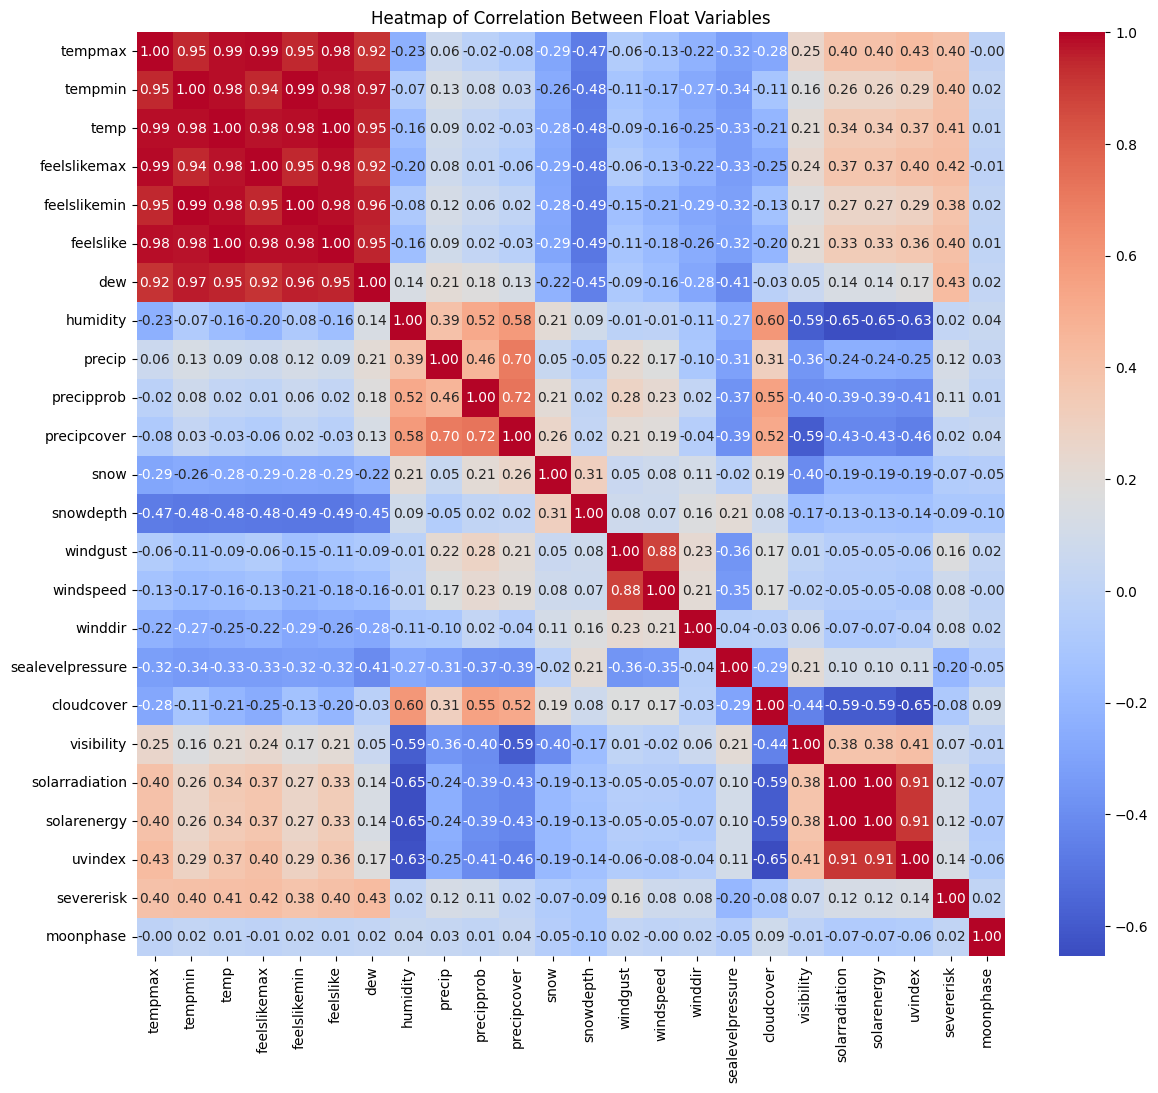

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only float64 columns for correlation analysis
float_int_data = df.select_dtypes(include=['float64', 'int64'])

# Calculating correlation matrix
corr_matrix = float_int_data.corr()

# Generating a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Between Float Variables')
plt.show()

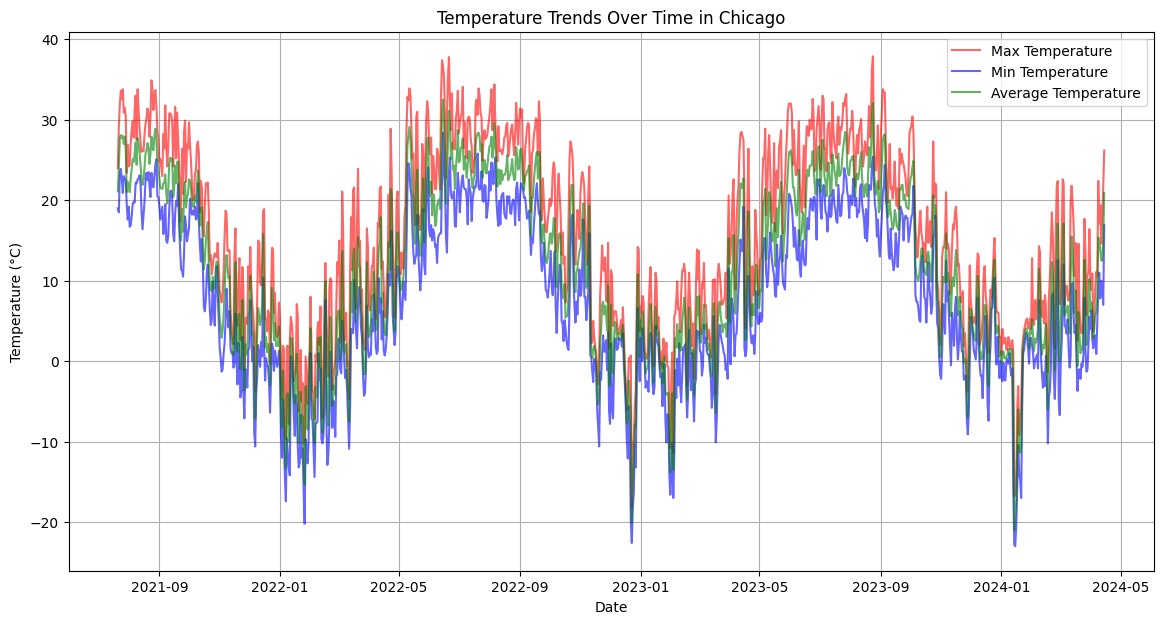

In [11]:
# Convert datetime to proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Plotting time series of temperatures
plt.figure(figsize=(14, 7))
plt.plot(df['datetime'], df['tempmax'], label='Max Temperature', color='red', alpha=0.6)
plt.plot(df['datetime'], df['tempmin'], label='Min Temperature', color='blue', alpha=0.6)
plt.plot(df['datetime'], df['temp'], label='Average Temperature', color='green', alpha=0.6)
plt.title('Temperature Trends Over Time in Chicago')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


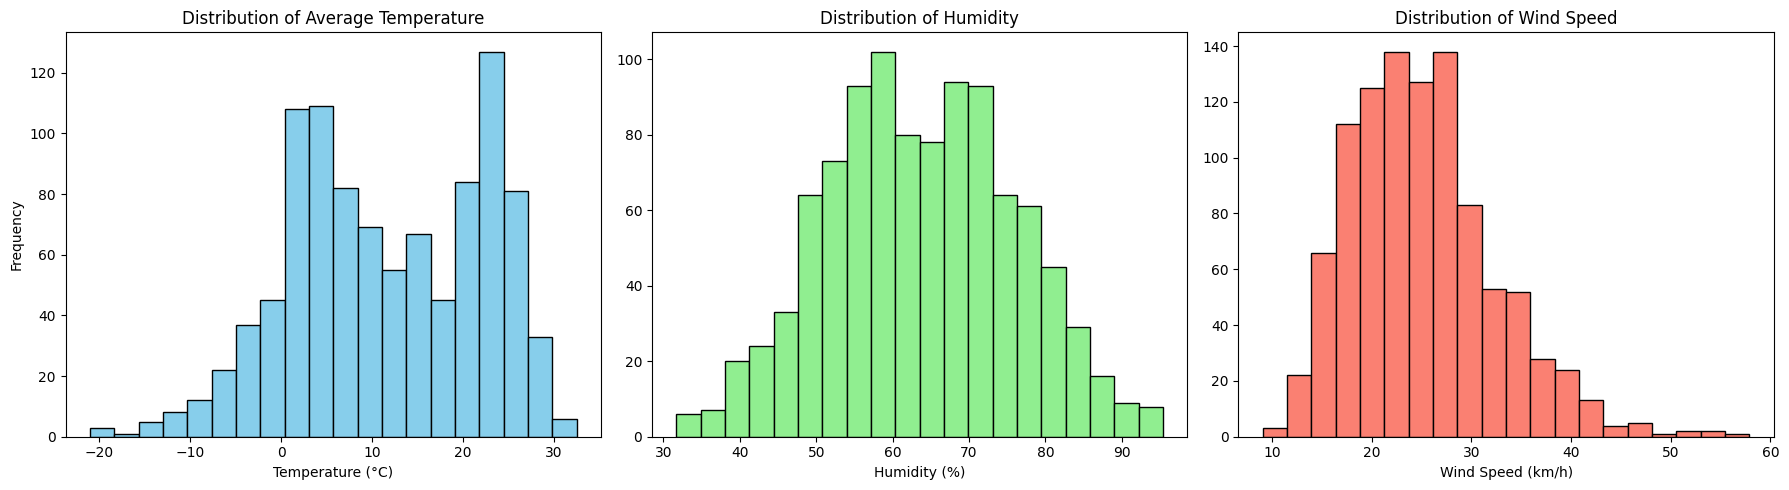

In [12]:
# Plotting histograms for temperature, humidity, and wind speed
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Temperature Histogram
ax[0].hist(df['temp'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Average Temperature')
ax[0].set_xlabel('Temperature (°C)')
ax[0].set_ylabel('Frequency')

# Humidity Histogram
ax[1].hist(df['humidity'], bins=20, color='lightgreen', edgecolor='black')
ax[1].set_title('Distribution of Humidity')
ax[1].set_xlabel('Humidity (%)')

# Wind Speed Histogram
ax[2].hist(df['windspeed'], bins=20, color='salmon', edgecolor='black')
ax[2].set_title('Distribution of Wind Speed')
ax[2].set_xlabel('Wind Speed (km/h)')

plt.tight_layout()
plt.show()


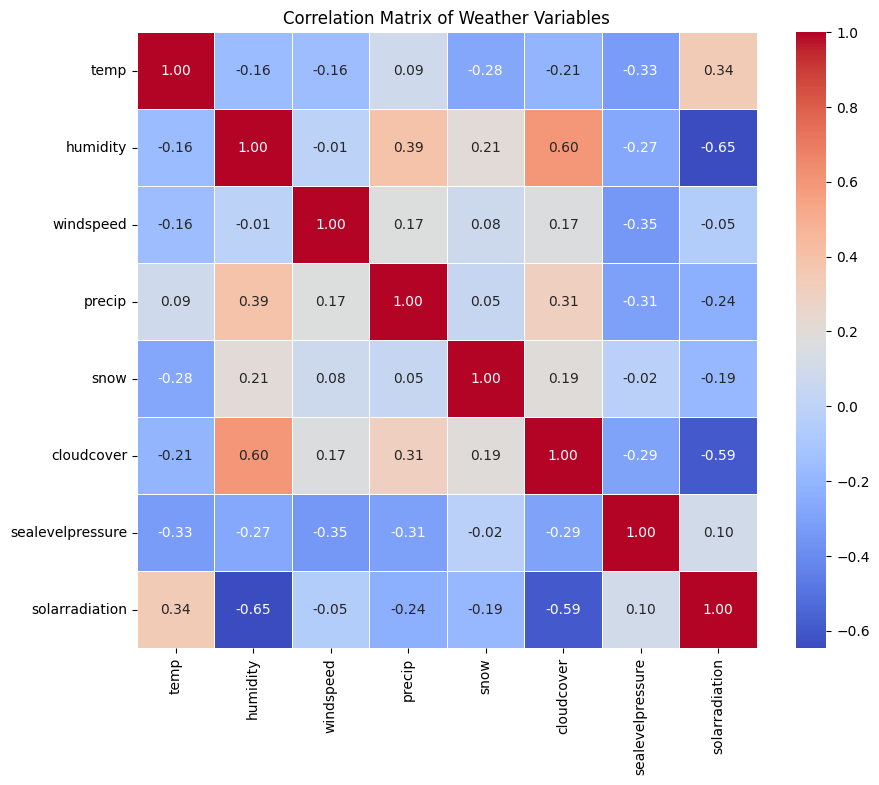

In [13]:
# Selecting numerical columns for correlation matrix
numerical_cols = ['temp', 'humidity', 'windspeed', 'precip', 'snow', 'cloudcover', 'sealevelpressure', 'solarradiation']

# Calculating correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

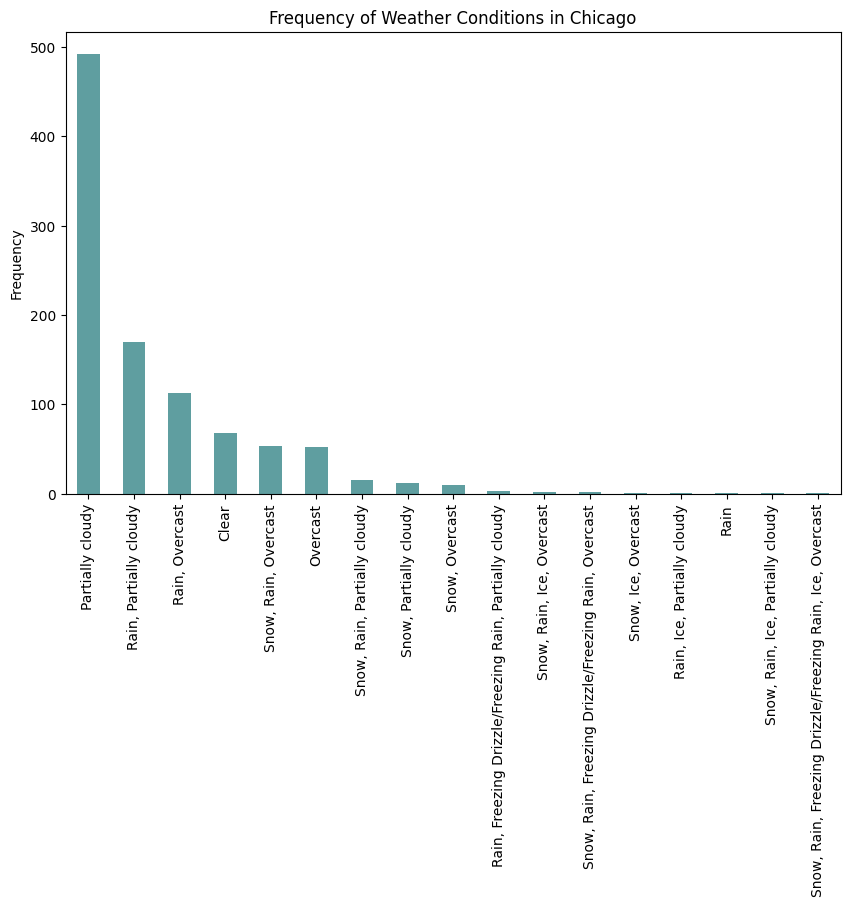

In [14]:
# Counting the frequency of different weather conditions
conditions_count = df['conditions'].value_counts()

# Plotting the bar graph of weather conditions
plt.figure(figsize=(10, 6))
conditions_count.plot(kind='bar', color='cadetblue')
plt.title('Frequency of Weather Conditions in Chicago')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

# 4. Chi Sqaure Test for Categorical and Categorical Associations





In [15]:
#Identifying Categorical Columns through the given data set
def cat_columns(df, threshold=10):
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype == 'object' or len(df[column].unique()) <= threshold:
            categorical_columns.append(column)
    return categorical_columns

categorical_columns = cat_columns(df)
display("Categorical columns:", categorical_columns)

'Categorical columns:'

['name',
 'precipprob',
 'preciptype',
 'severerisk',
 'conditions',
 'description',
 'icon',
 'stations']

In [16]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_tests(df, columns):
    results = []
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            table = pd.crosstab(df[columns[i]], df[columns[j]])

            # Perform the Chi-square test
            chi2, p, dof, expected = chi2_contingency(table)
            n = table.values.sum()
            r, k = table.shape
            results.append({
                'Variable 1': columns[i],
                'Variable 2': columns[j],
                'Chi-square Stat': chi2,
                'p-value': p,
                'Degrees of Freedom': dof,
                'Sample Size': n,
                'Table Shape': (r, k)
            })
    return pd.DataFrame(results)

chi_square_results = chi_square_tests(df, categorical_columns)
display(chi_square_results)

,Variable 1,Variable 2,Chi-square Stat,p-value,Degrees of Freedom,Sample Size,Table Shape
0,name,precipprob,0.000000,1.000000e+00,0,999,"(1, 2)"
1,name,preciptype,0.000000,1.000000e+00,0,558,"(1, 10)"
2,name,severerisk,0.000000,1.000000e+00,0,826,"(1, 7)"
3,name,conditions,0.000000,1.000000e+00,0,999,"(1, 17)"
4,name,description,0.000000,1.000000e+00,0,999,"(1, 55)"
5,name,icon,0.000000,1.000000e+00,0,999,"(1, 6)"
6,name,stations,0.000000,1.000000e+00,0,999,"(1, 14)"
7,precipprob,preciptype,56.918241,5.238961e-09,9,558,"(2, 10)"
8,precipprob,severerisk,12.408061,5.346057e-02,6,826,"(2, 7)"
9,precipprob,conditions,999.000000,1.833754e-202,16,999,"(2, 17)"


# The P-value threshold is 0.05 so based on that we are identifying the significant results

In [17]:
p_value_threshold = 0.05

chi_data= pd.DataFrame(chi_square_results)
chi_result = chi_data[chi_data['p-value'] <= p_value_threshold]

# Displaying the significant results
display(chi_result)

#we could use top 10 from this

,Variable 1,Variable 2,Chi-square Stat,p-value,Degrees of Freedom,Sample Size,Table Shape
7,precipprob,preciptype,56.918241,5.238961e-09,9,558,"(2, 10)"
9,precipprob,conditions,999.000000,1.833754e-202,16,999,"(2, 17)"
10,precipprob,description,999.000000,4.460417e-174,54,999,"(2, 55)"
11,precipprob,icon,999.000000,9.894113e-214,5,999,"(2, 6)"
12,precipprob,stations,42.098854,6.309952e-05,13,999,"(2, 14)"
14,preciptype,conditions,3809.226469,0.000000e+00,144,558,"(10, 17)"
15,preciptype,description,1249.177462,1.304047e-68,486,558,"(10, 55)"
16,preciptype,icon,353.613560,8.200168e-54,36,558,"(10, 5)"
17,preciptype,stations,354.307219,5.594017e-28,108,558,"(10, 13)"
18,severerisk,conditions,261.258079,3.166680e-17,96,826,"(7, 17)"


# Cramer's V for Categorical and Categorical Associations

In [18]:
def calculate_cramers_v(subset_df):
    df = subset_df.copy()
    df['Cramer\'s V'] = df.apply(
        lambda row: np.sqrt(row['Chi-square Stat'] / (row['Sample Size'] * min(row['Table Shape'][0] - 1, row['Table Shape'][1] - 1)))
        if min(row['Table Shape'][0] - 1, row['Table Shape'][1] - 1) > 0 else 0,
        axis=1
    )
    return df

In [19]:
# Calculating Cramer's V for only the top 10 significant results
top_10_cramers_v = calculate_cramers_v(chi_result)

# Displaying the results with Cramer's V
display(top_10_cramers_v)

,Variable 1,Variable 2,Chi-square Stat,p-value,Degrees of Freedom,Sample Size,Table Shape,Cramer's V
7,precipprob,preciptype,56.918241,5.238961e-09,9,558,"(2, 10)",0.319381
9,precipprob,conditions,999.000000,1.833754e-202,16,999,"(2, 17)",1.000000
10,precipprob,description,999.000000,4.460417e-174,54,999,"(2, 55)",1.000000
11,precipprob,icon,999.000000,9.894113e-214,5,999,"(2, 6)",1.000000
12,precipprob,stations,42.098854,6.309952e-05,13,999,"(2, 14)",0.205283
14,preciptype,conditions,3809.226469,0.000000e+00,144,558,"(10, 17)",0.870924
15,preciptype,description,1249.177462,1.304047e-68,486,558,"(10, 55)",0.498739
16,preciptype,icon,353.613560,8.200168e-54,36,558,"(10, 5)",0.398031
17,preciptype,stations,354.307219,5.594017e-28,108,558,"(10, 13)",0.265614
18,severerisk,conditions,261.258079,3.166680e-17,96,826,"(7, 17)",0.229599


In [20]:
def classify_association(cramers_v):
    if cramers_v >= 0.7:
        return 'Strong'
    elif 0.5 <= cramers_v < 0.7:
        return 'Moderate'
    elif 0.3 <= cramers_v < 0.5:
        return 'Weak'
    else:
        return 'Negligible or No Association'

top_10_cramers_v['Association Strength'] = top_10_cramers_v['Cramer\'s V'].apply(classify_association)

association_strengths = top_10_cramers_v[['Variable 1', 'Variable 2', 'Association Strength']]

display(association_strengths)

highly_related_pairs = association_strengths[association_strengths['Association Strength'] == 'Strong'][['Variable 1', 'Variable 2']].values.tolist()



,Variable 1,Variable 2,Association Strength
7,precipprob,preciptype,Weak
9,precipprob,conditions,Strong
10,precipprob,description,Strong
11,precipprob,icon,Strong
12,precipprob,stations,Negligible or No Association
14,preciptype,conditions,Strong
15,preciptype,description,Weak
16,preciptype,icon,Weak
17,preciptype,stations,Negligible or No Association
18,severerisk,conditions,Negligible or No Association


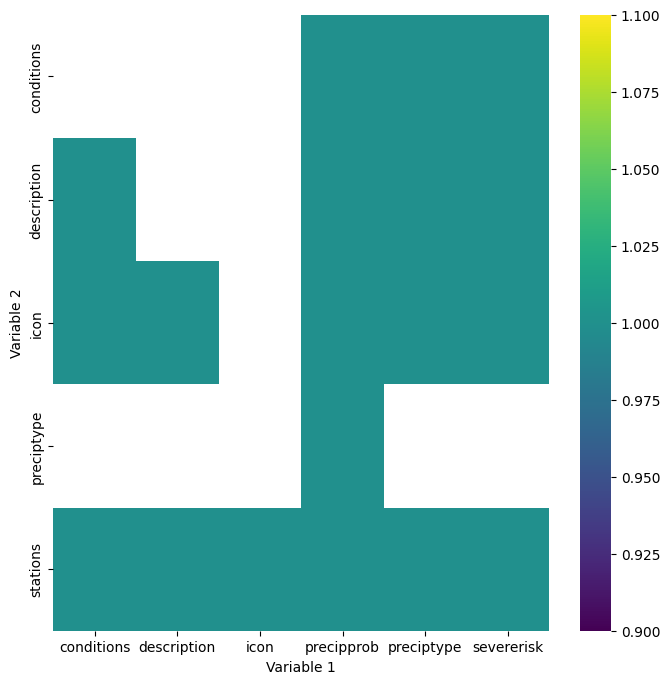

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Variable 2'].value_counts()
    for x_label, grp in association_strengths.groupby('Variable 1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Variable 1')
_ = plt.ylabel('Variable 2')

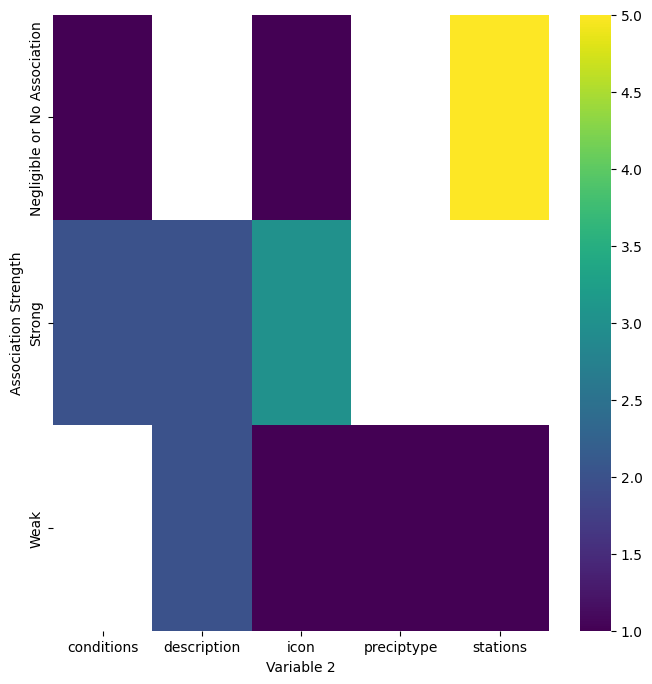

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Association Strength'].value_counts()
    for x_label, grp in association_strengths.groupby('Variable 2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Variable 2')
_ = plt.ylabel('Association Strength')

In [23]:
# Display the highly related variable pairs as a list
print("\nHighly Related Variable Pairs:")
for pair in highly_related_pairs:
    display(f"{pair[0]} - {pair[1]}")


Highly Related Variable Pairs:


'precipprob - conditions'

'precipprob - description'

'precipprob - icon'

'preciptype - conditions'

'conditions - description'

'conditions - icon'

'description - icon'

NUMERICAL RELATIONS:

In [24]:
import pandas as pd

df.sort_values(by='datetime', inplace=True)
lag_window = 7

for i in range(1, lag_window + 1):
    df[f'temp_lag_{i}'] = df['temp'].shift(i)

# Replace NaN values with 0
df.fillna(0, inplace=True)

# Reset index after dropping NaN values
df.reset_index(drop=True, inplace=True)

print(df.head())



                    name   datetime  tempmax  tempmin  temp  feelslikemax  \
0  Chicago,United States 2021-07-21     24.0     19.0  21.1          24.0   
1  Chicago,United States 2021-07-22     29.2     18.5  24.1          30.9   
2  Chicago,United States 2021-07-23     31.9     23.4  27.7          33.6   
3  Chicago,United States 2021-07-24     33.6     23.9  28.1          37.4   
4  Chicago,United States 2021-07-25     32.6     22.7  27.7          31.0   

   feelslikemin  feelslike   dew  humidity  ...  \
0          19.0       21.1  15.6      71.2  ...   
1          18.5       24.8  18.3      70.8  ...   
2          23.4       28.7  20.4      65.8  ...   
3          23.9       30.0  21.5      68.4  ...   
4          22.7       27.3  16.0      54.2  ...   

                                   description               icon  \
0            Partly cloudy throughout the day.  partly-cloudy-day   
1            Partly cloudy throughout the day.  partly-cloudy-day   
2  Partly cloudy throug

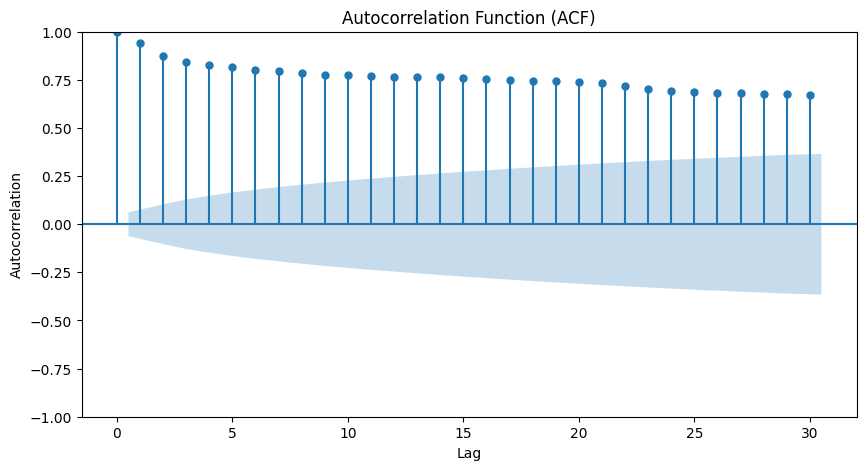

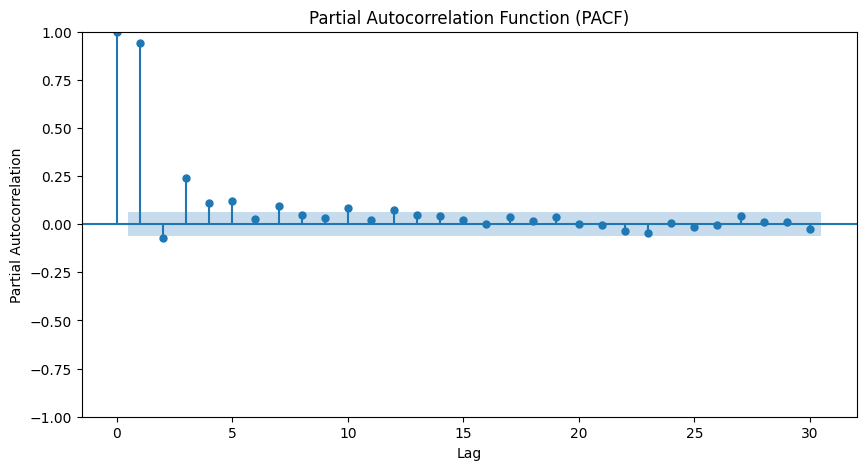

In [25]:
#acf and pacf correlation analysis:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['temp'], lags=30, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['temp'], lags=30, ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression

# Exclude lagged temperature variables from features
numeric_columns = df.select_dtypes(include='number').columns
lagged_temp_columns = [col for col in df.columns if col.startswith('temp_lag_')]
features = [col for col in numeric_columns if col not in ['temp'] + lagged_temp_columns]

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(df[features], df['temp'])

# Get feature scores
feature_scores = pd.DataFrame({'Feature': features, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)
print("Feature Scores:")
print(feature_scores)



# we could use the top 12 from this

Feature Scores:
             Feature          Score
4          feelslike  158632.208062
0            tempmax   33599.530251
1            tempmin   28813.476473
3       feelslikemin   27614.237898
2       feelslikemax   24328.992364
5                dew    9718.404992
11         snowdepth     293.350548
20           uvindex     156.928745
18    solarradiation     131.384195
19       solarenergy     131.152020
15  sealevelpressure     121.091258
21        severerisk      98.038893
10              snow      82.895250
14           winddir      66.178285
17        visibility      46.620882
16        cloudcover      44.714684
6           humidity      27.706885
13         windspeed      25.405898
12          windgust       8.899362
7             precip       8.274553
9        precipcover       1.020599
8         precipprob       0.495636
22         moonphase       0.072387


In [27]:
#TEST 2: COLLINEARITY:
# Exclude lagged temperature variables, 'temp', 'tempmax', and 'tempmin' from correlation matrix calculation
numeric_columns = df.select_dtypes(include='number').columns
lagged_temp_columns = [col for col in df.columns if col.startswith('temp_lag_')]
exclude_columns = ['temp', 'tempmax', 'tempmin'] + lagged_temp_columns
numerical_features = [col for col in numeric_columns if col not in exclude_columns]

correlation_matrix = df[numerical_features].corr()

# Identify highly correlated variables
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

print("Highly Correlated Variable Pairs:")
print(highly_correlated_pairs)

Highly Correlated Variable Pairs:
[('feelslikemin', 'feelslikemax'), ('feelslike', 'feelslikemax'), ('feelslike', 'feelslikemin'), ('dew', 'feelslikemax'), ('dew', 'feelslikemin'), ('dew', 'feelslike'), ('windspeed', 'windgust'), ('solarenergy', 'solarradiation'), ('uvindex', 'solarradiation'), ('uvindex', 'solarenergy')]


In [28]:
#TEST 3:
from scipy import stats

# Exclude lagged temperature variables, 'temp', 'tempmax', and 'tempmin'
numeric_columns = df.select_dtypes(include='number').columns
exclude_columns = ['temp', 'tempmax', 'tempmin'] + [col for col in df.columns if col.startswith('temp_lag_')]
numerical_features = [col for col in numeric_columns if col not in exclude_columns]

# Detect outliers using z-score
z_scores = stats.zscore(df[numerical_features])
outliers = df[(z_scores > 3).any(axis=1)]  # Adjust the threshold as needed

# Remove outliers
cleaned_df = df[(z_scores < 3).all(axis=1)]
print("Number of outliers removed:", len(outliers))

Number of outliers removed: 122


In [29]:
# Remove outliers from the main DataFrame
cleaned_df = df[~df.index.isin(outliers.index)]

# Print the cleaned DataFrame
print("Cleaned DataFrame without outliers:")
print(cleaned_df.head())

Cleaned DataFrame without outliers:
                    name   datetime  tempmax  tempmin  temp  feelslikemax  \
0  Chicago,United States 2021-07-21     24.0     19.0  21.1          24.0   
1  Chicago,United States 2021-07-22     29.2     18.5  24.1          30.9   
2  Chicago,United States 2021-07-23     31.9     23.4  27.7          33.6   
3  Chicago,United States 2021-07-24     33.6     23.9  28.1          37.4   
4  Chicago,United States 2021-07-25     32.6     22.7  27.7          31.0   

   feelslikemin  feelslike   dew  humidity  ...  \
0          19.0       21.1  15.6      71.2  ...   
1          18.5       24.8  18.3      70.8  ...   
2          23.4       28.7  20.4      65.8  ...   
3          23.9       30.0  21.5      68.4  ...   
4          22.7       27.3  16.0      54.2  ...   

                                   description               icon  \
0            Partly cloudy throughout the day.  partly-cloudy-day   
1            Partly cloudy throughout the day.  partly-c

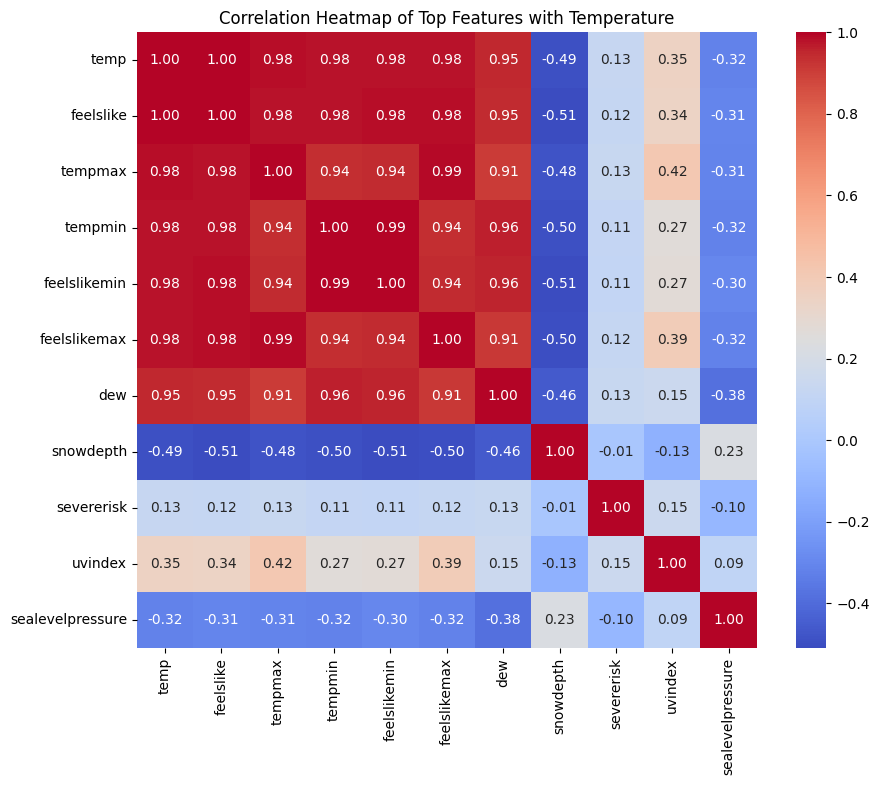

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
other_relevant_variables = ['feelslike', 'tempmax', 'tempmin', 'feelslikemin', 'feelslikemax',
                            'dew', 'snowdepth', 'severerisk', 'uvindex', 'sealevelpressure']
temp_values = ['temp']
correlation_matrix = cleaned_df[ temp_values + other_relevant_variables].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top Features with Temperature')
plt.show()


In [38]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'selected_features' is a list of feature names you want to display
selected_features = ['datetime','temp','feelslike', 'tempmax', 'tempmin', 'feelslikemin', 'feelslikemax',
                            'dew', 'snowdepth', 'severerisk', 'uvindex', 'sealevelpressure']

# Select the desired features from the DataFrame
selected_df = cleaned_df[selected_features]

# Display the selected features
print(selected_df)


      datetime  temp  feelslike  tempmax  tempmin  feelslikemin  feelslikemax  \
0   2021-07-21  21.1       21.1     24.0     19.0          19.0          24.0   
1   2021-07-22  24.1       24.8     29.2     18.5          18.5          30.9   
2   2021-07-23  27.7       28.7     31.9     23.4          23.4          33.6   
3   2021-07-24  28.1       30.0     33.6     23.9          23.9          37.4   
4   2021-07-25  27.7       27.3     32.6     22.7          22.7          31.0   
..         ...   ...        ...      ...      ...           ...           ...   
994 2024-04-10  13.9       13.9     19.4      7.8           7.1          19.4   
995 2024-04-11  12.5       12.5     14.6     10.0          10.0          14.6   
996 2024-04-12  12.5       12.0     17.8      9.7           7.1          17.8   
997 2024-04-13  14.8       14.3     21.5      7.0           5.4          21.5   
998 2024-04-14  20.9       20.9     26.2     16.9          16.9          26.2   

      dew  snowdepth  sever

In [39]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [40]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series_list):
    for series_name, series_data in series_list.items():
        print(f"ADF Test for {series_name}:")
        dftest = adfuller(series_data, autolag='AIC')
        print("ADF Statistic:", dftest[0])
        print("P-Value:", dftest[1])
        print("Number of Lags:", dftest[2])
        print("Number of Observations Used for ADF Regression and Critical Values Calculation:", dftest[3])
        print("Critical Values:")
        for key, val in dftest[4].items():
            print(f"\t{key}: {val}")
        print("\n")

# Assuming 'df' is your DataFrame containing the series data
# Assuming 'temp_lag_3', 'temp_lag_4', ..., 'temp_lag_7' are the lagged series names
# Create a dictionary of series to pass to the adf_test function
series_list = {'Temperature': selected_df['temp']}

# Perform ADF test for each series
adf_test(series_list)


ADF Test for Temperature:
ADF Statistic: -2.244293156080437
P-Value: 0.19056394340349986
Number of Lags: 13
Number of Observations Used for ADF Regression and Critical Values Calculation: 863
Critical Values:
	1%: -3.4379500665211276
	5%: -2.864894878219008
	10%: -2.5685563904109867




In [41]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [42]:
selected_df

,datetime,temp,feelslike,tempmax,tempmin,feelslikemin,feelslikemax,dew,snowdepth,severerisk,uvindex,sealevelpressure
0,2021-07-21,21.1,21.1,24.0,19.0,19.0,24.0,15.6,0.0,0.0,2,1019.7
1,2021-07-22,24.1,24.8,29.2,18.5,18.5,30.9,18.3,0.0,0.0,4,1020.5
2,2021-07-23,27.7,28.7,31.9,23.4,23.4,33.6,20.4,0.0,0.0,5,1017.5
3,2021-07-24,28.1,30.0,33.6,23.9,23.9,37.4,21.5,0.0,0.0,4,1011.4
4,2021-07-25,27.7,27.3,32.6,22.7,22.7,31.0,16.0,0.0,0.0,8,1012.6
...,...,...,...,...,...,...,...,...,...,...,...,...
994,2024-04-10,13.9,13.9,19.4,7.8,7.1,19.4,3.1,0.0,10.0,5,1012.5
995,2024-04-11,12.5,12.5,14.6,10.0,10.0,14.6,5.4,0.0,10.0,2,1002.5
996,2024-04-12,12.5,12.0,17.8,9.7,7.1,17.8,5.2,0.0,10.0,9,1007.3
997,2024-04-13,14.8,14.3,21.5,7.0,5.4,21.5,1.8,0.0,10.0,7,1015.9


In [43]:
#Nope its not stationary so lets, perform Differencing:
adf_test = adfuller(selected_df['temp'])
print(f'p-value: {adf_test[1]}')

p-value: 0.19056394340349986


In [44]:
training_data = selected_df.sample(frac=0.8, random_state=25)
testing_data = selected_df.drop(training_data.index)

In [45]:
train = training_data['temp']
train.reset_index(drop=True, inplace=True)
train

0       4.9
1      21.3
2       2.8
3       6.1
4       4.8
       ... 
697     0.0
698    21.5
699     5.5
700   -14.4
701    -4.2
Name: temp, Length: 702, dtype: float64

Text(0.5, 1.0, 'Residuals of Differenced Time Series')

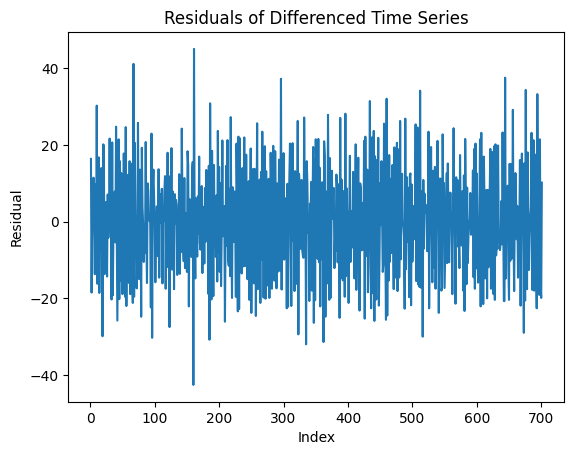

In [46]:

df_train_diff = train.diff().dropna()
df_train_diff.plot()

plt.xlabel('Index')
plt.ylabel('Residual')
plt.title('Residuals of Differenced Time Series')

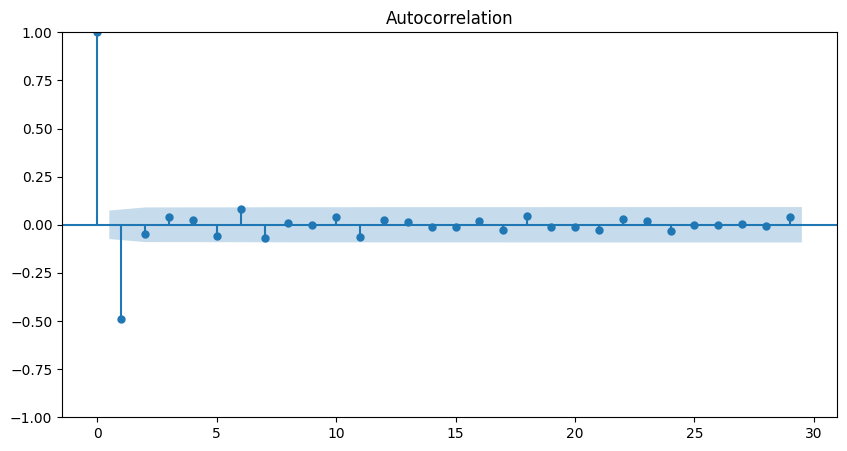

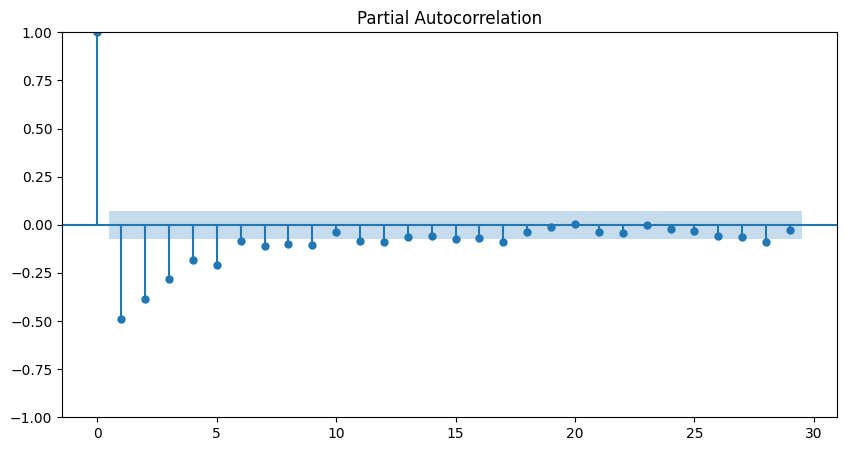

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Set the plot size
plt.figure(figsize=(10, 5))

# Plot ACF
acf_original = plot_acf(df_train_diff, ax=plt.gca())

# Set the plot size for another figure
plt.figure(figsize=(10, 5))

# Plot PACF
pacf_original = plot_pacf(df_train_diff, ax=plt.gca())

plt.show()

In [48]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 2.480128867451355e-21


In [49]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  702
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2618.994
Date:                Fri, 26 Apr 2024   AIC                           5243.987
Time:                        05:13:57   BIC                           5257.645
Sample:                             0   HQIC                          5249.266
                                - 702                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0353      0.039     -0.912      0.362      -0.111       0.041
ma.L1         -0.9999      0.201     -4.971      0.000      -1.394      -0.606
sigma2       101.9949     22.196      4.595      0.0

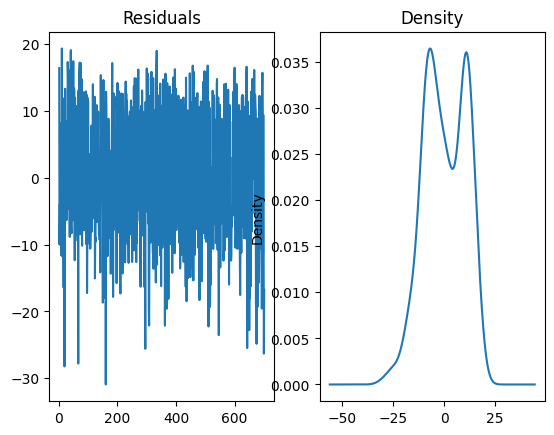

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

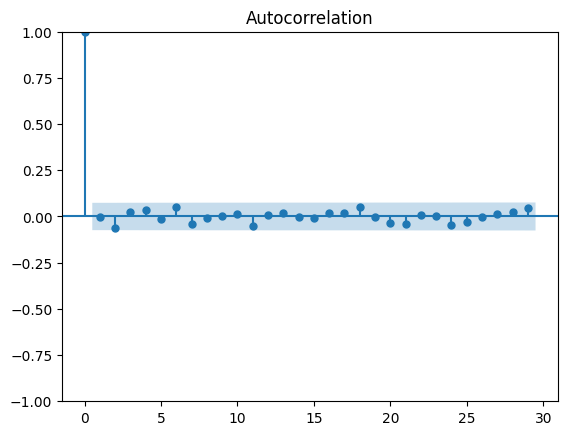

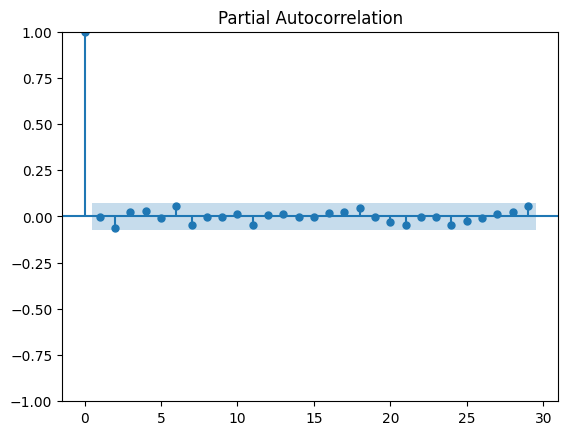

In [ ]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [51]:
#SO ITS stationary right?
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

<Axes: >

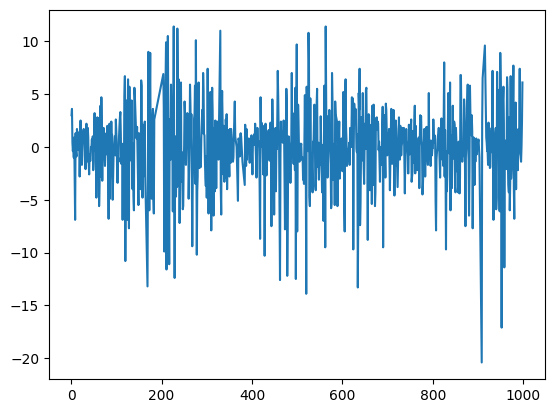

In [52]:
selected_df['temp_diff'] = selected_df['temp'].diff().dropna()
selected_df['temp_diff'].plot()

In [53]:
selected_df = selected_df.dropna()

In [54]:
stepwise_fit = auto_arima(selected_df['temp_diff'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  876
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2341.749
Date:                Fri, 26 Apr 2024   AIC                           4691.498
Time:                        05:36:02   BIC                           4710.600
Sample:                             0   HQIC                          4698.805
                                - 876                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4096      0.061      6.738      0.000       0.290       0.529
ma.L1         -0.4768      0.060     -7.936      0.000      -0.595      -0.359
ma.L2         -0.3417      0.040     -8.560      0.000      -0.420      -0.263
sigma2        12.2791      0.394     31.158      0.000      11.507      13.052
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               293.42
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.53
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
stepwise_fit = auto_arima(selected_df['temp'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  876
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2339.272
Date:                Fri, 26 Apr 2024   AIC                           4686.545
Time:                        05:37:07   BIC                           4705.641
Sample:                             0   HQIC                          4693.850
                                - 876                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4088      0.061      6.714      0.000       0.289       0.528
ma.L1         -0.4766      0.060     -7.918      0.000      -0.595      -0.359
ma.L2         -0.3414      0.040     -8.543      0.000      -0.420      -0.263
sigma2        12.2847      0.394     31.154      0.000      11.512      13.058
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               291.92
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.52
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
print(selected_df.shape)
train=selected_df.iloc[:-30]
test=selected_df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(876, 13)
(846, 13) (30, 13)
datetime            2024-03-14 00:00:00
temp                               10.3
feelslike                           8.6
tempmax                            17.2
tempmin                             5.9
feelslikemin                        1.3
feelslikemax                       17.2
dew                                 6.8
snowdepth                           0.0
severerisk                         10.0
uvindex                               1
sealevelpressure                 1010.4
temp_diff                          -3.6
Name: 967, dtype: object datetime            2024-04-14 00:00:00
temp                               20.9
feelslike                          20.9
tempmax                            26.2
tempmin                            16.9
feelslikemin                       16.9
feelslikemax                       26.2
dew                                 6.7
snowdepth                           0.0
severerisk                         10.0
uvindex                   

In [58]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['temp'],order=(1,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                  846
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2258.480
Date:                Fri, 26 Apr 2024   AIC                           4524.960
Time:                        05:37:34   BIC                           4543.918
Sample:                             0   HQIC                          4532.224
                                - 846                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4129      0.061      6.723      0.000       0.293       0.533
ma.L1         -0.4801      0.061     -7.880      0.000      -0.600      -0.361
ma.L2         -0.3403      0.041     -8.373      0.000      -0.420      -0.261
sigma2        12.2675      0.397     30.938      0.000      11.490      13.045
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               306.58
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.55
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
selected_df.set_index('datetime', inplace=True)

In [60]:
selected_df

,temp,feelslike,tempmax,tempmin,feelslikemin,feelslikemax,dew,snowdepth,severerisk,uvindex,sealevelpressure,temp_diff
datetime,,,,,,,,,,,,
2021-07-22,24.1,24.8,29.2,18.5,18.5,30.9,18.3,0.0,0.0,4,1020.5,3.0
2021-07-23,27.7,28.7,31.9,23.4,23.4,33.6,20.4,0.0,0.0,5,1017.5,3.6
2021-07-24,28.1,30.0,33.6,23.9,23.9,37.4,21.5,0.0,0.0,4,1011.4,0.4
2021-07-25,27.7,27.3,32.6,22.7,22.7,31.0,16.0,0.0,0.0,8,1012.6,-0.4
2021-07-26,28.0,27.5,33.8,20.9,20.9,32.1,13.9,0.0,0.0,7,1015.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-10,13.9,13.9,19.4,7.8,7.1,19.4,3.1,0.0,10.0,5,1012.5,-0.9
2024-04-11,12.5,12.5,14.6,10.0,10.0,14.6,5.4,0.0,10.0,2,1002.5,-1.4
2024-04-12,12.5,12.0,17.8,9.7,7.1,17.8,5.2,0.0,10.0,9,1007.3,0.0


In [61]:
print(selected_df.shape)
train=selected_df.iloc[:-30]
test=selected_df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(876, 12)
(846, 12) (30, 12)
temp                  10.3
feelslike              8.6
tempmax               17.2
tempmin                5.9
feelslikemin           1.3
feelslikemax          17.2
dew                    6.8
snowdepth              0.0
severerisk            10.0
uvindex                1.0
sealevelpressure    1010.4
temp_diff             -3.6
Name: 2024-03-14 00:00:00, dtype: float64 temp                  20.9
feelslike             20.9
tempmax               26.2
tempmin               16.9
feelslikemin          16.9
feelslikemax          26.2
dew                    6.7
snowdepth              0.0
severerisk            10.0
uvindex                8.0
sealevelpressure    1006.2
temp_diff              6.1
Name: 2024-04-14 00:00:00, dtype: float64


In [62]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
pred.index = selected_df.index[start:end+1]
print(pred)

datetime
2024-03-14    11.416360
2024-03-15    10.263472
2024-03-16     9.787445
2024-03-17     9.590894
2024-03-18     9.509738
2024-03-19     9.476229
2024-03-20     9.462393
2024-03-21     9.456680
2024-03-23     9.454321
2024-03-24     9.453347
2024-03-25     9.452945
2024-03-26     9.452779
2024-03-27     9.452710
2024-03-28     9.452682
2024-03-29     9.452671
2024-03-30     9.452666
2024-03-31     9.452664
2024-04-01     9.452663
2024-04-02     9.452663
2024-04-04     9.452662
2024-04-05     9.452662
2024-04-06     9.452662
2024-04-07     9.452662
2024-04-08     9.452662
2024-04-09     9.452662
2024-04-10     9.452662
2024-04-11     9.452662
2024-04-12     9.452662
2024-04-13     9.452662
2024-04-14     9.452662
Name: predicted_mean, dtype: float64


<Axes: xlabel='datetime'>

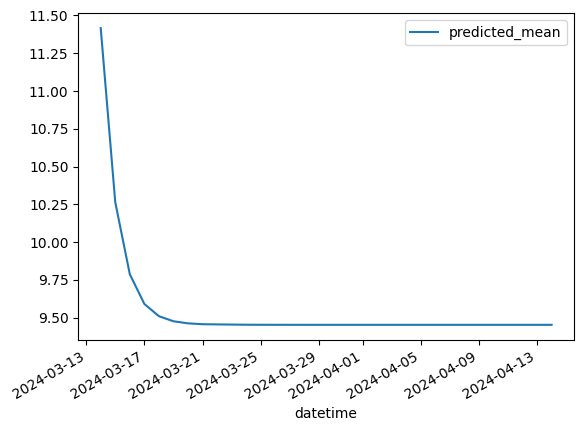

In [63]:
pred.plot(legend=True)

<Axes: xlabel='datetime'>

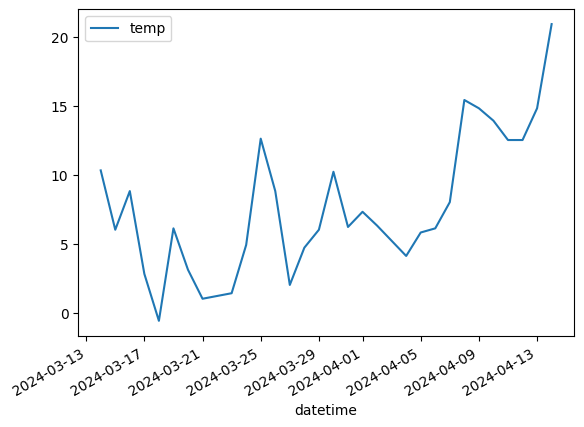

In [64]:
test['temp'].plot(legend=True)

In [65]:
test['temp'].mean()

7.8900000000000015

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['temp']))
print(rmse)

5.231665551247136


In [67]:
model2 = ARIMA(selected_df['temp'], order = (1,1,2))
model2 = model2.fit()
selected_df.tail()

,temp,feelslike,tempmax,tempmin,feelslikemin,feelslikemax,dew,snowdepth,severerisk,uvindex,sealevelpressure,temp_diff
datetime,,,,,,,,,,,,
2024-04-10,13.9,13.9,19.4,7.8,7.1,19.4,3.1,0.0,10.0,5,1012.5,-0.9
2024-04-11,12.5,12.5,14.6,10.0,10.0,14.6,5.4,0.0,10.0,2,1002.5,-1.4
2024-04-12,12.5,12.0,17.8,9.7,7.1,17.8,5.2,0.0,10.0,9,1007.3,0.0
2024-04-13,14.8,14.3,21.5,7.0,5.4,21.5,1.8,0.0,10.0,7,1015.9,2.3
2024-04-14,20.9,20.9,26.2,16.9,16.9,26.2,6.7,0.0,10.0,8,1006.2,6.1


In [68]:
index_future_dates=pd.date_range(start='2024-04-14',end='2024-05-14')
#print(index_future_dates)
pred=model2.predict(start=len(selected_df),end=len(selected_df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2024-04-14    18.955524
2024-04-15    15.731766
2024-04-16    14.413743
2024-04-17    13.874874
2024-04-18    13.654559
2024-04-19    13.564484
2024-04-20    13.527657
2024-04-21    13.512600
2024-04-22    13.506444
2024-04-23    13.503928
2024-04-24    13.502899
2024-04-25    13.502478
2024-04-26    13.502306
2024-04-27    13.502236
2024-04-28    13.502207
2024-04-29    13.502195
2024-04-30    13.502190
2024-05-01    13.502188
2024-05-02    13.502188
2024-05-03    13.502187
2024-05-04    13.502187
2024-05-05    13.502187
2024-05-06    13.502187
2024-05-07    13.502187
2024-05-08    13.502187
2024-05-09    13.502187
2024-05-10    13.502187
2024-05-11    13.502187
2024-05-12    13.502187
2024-05-13    13.502187
2024-05-14    13.502187
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

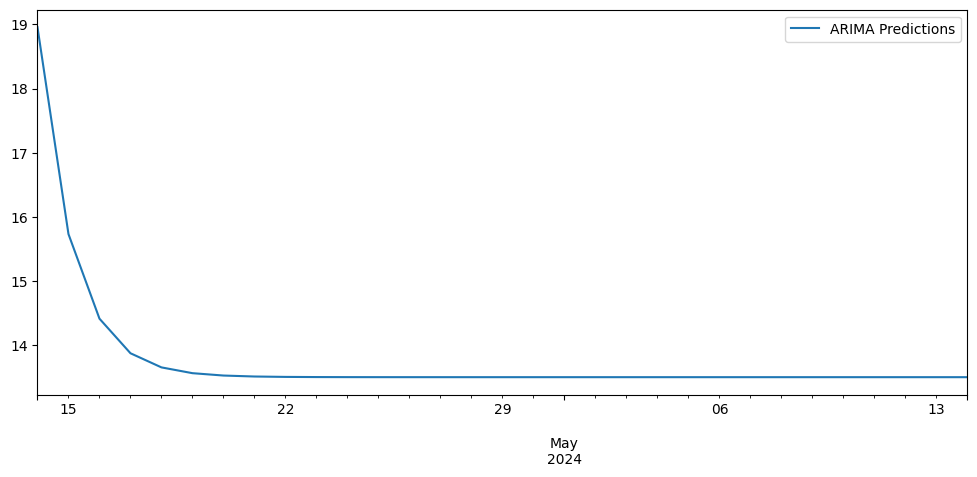

In [69]:
pred.plot(figsize=(12,5),legend=True)

SARIMAX


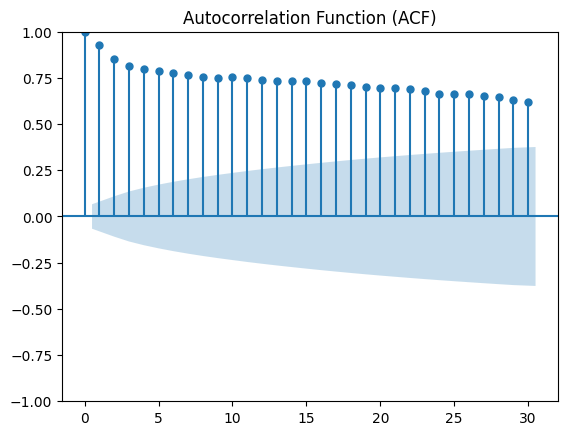

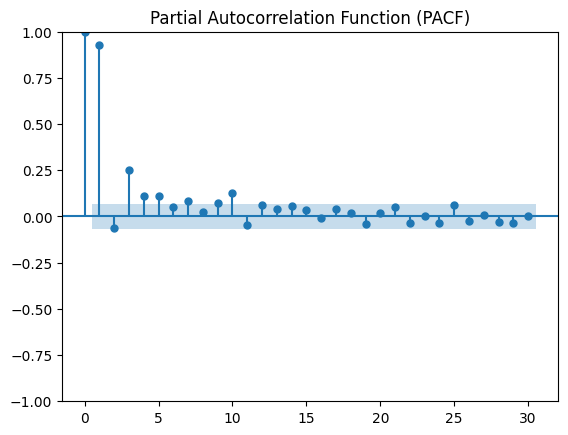

In [70]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'avg_temp' is the name of the column containing average temperature data in your DataFrame
avg_temp = selected_df['temp']

# Plot autocorrelation
plot_acf(avg_temp)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot partial autocorrelation
plot_pacf(avg_temp)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


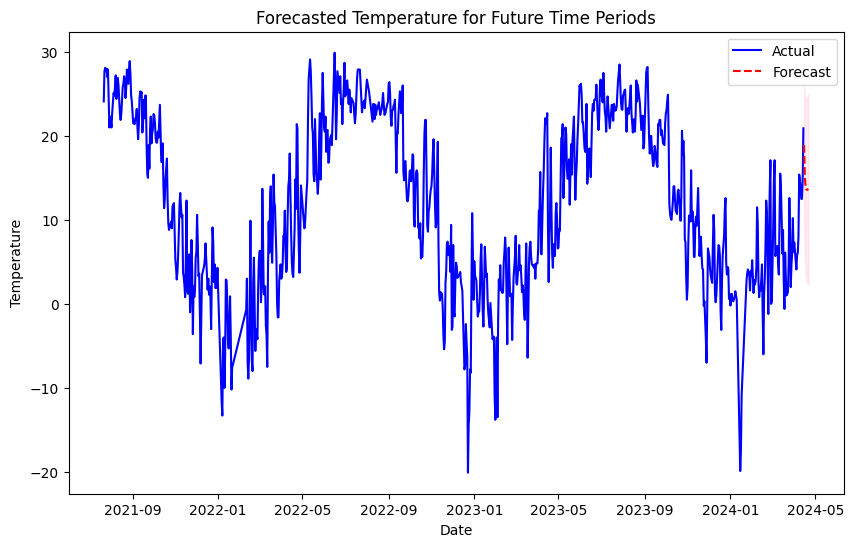

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'selected_df' is your DataFrame and it's indexed by date with a frequency
# Adjust 'order' and 'seasonal_order' to include differencing
order = (1, 1, 2)
seasonal_order = (1, 1, 2, 4)  # Example seasonal order with yearly seasonality

model = SARIMAX(selected_df['temp'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)  # Set disp=False to avoid printing convergence messages

# Forecasting steps ahead
steps = 7

# Forecast temperatures for future time periods without exogenous variables
future_forecast = model_fit.get_forecast(steps=steps)
forecasted_values = future_forecast.predicted_mean
conf_int = future_forecast.conf_int()  # Get the confidence intervals for the forecast

# Generate dates for the forecasted time periods (assuming daily frequency)
forecast_dates = pd.date_range(start=selected_df.index[-1], periods=steps + 1, freq='D')[1:]

# Plot the forecasted temperatures for future time periods
plt.figure(figsize=(10, 6))
plt.plot(selected_df.index, selected_df['temp'], label='Actual', color='blue')
plt.plot(forecast_dates, forecasted_values, label='Forecast', color='red', linestyle='--')

# Optional: Plot confidence intervals
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title('Forecasted Temperature for Future Time Periods')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

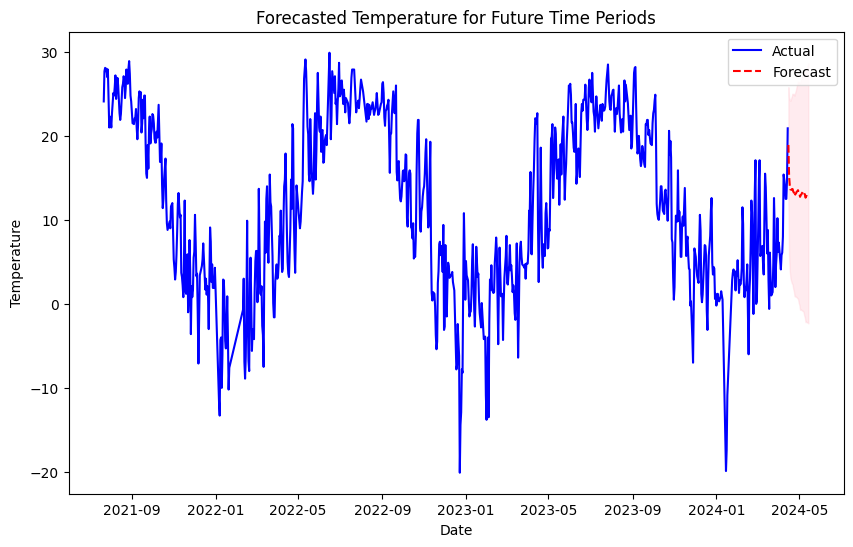

In [82]:
# Forecasting steps ahead
steps = 30

# Forecast temperatures for future time periods without exogenous variables
future_forecast = model_fit.get_forecast(steps=steps)
forecasted_values = future_forecast.predicted_mean
conf_int = future_forecast.conf_int()  # Get the confidence intervals for the forecast

# Generate dates for the forecasted time periods (assuming daily frequency)
forecast_dates = pd.date_range(start=selected_df.index[-1], periods=steps + 1, freq='D')[1:]

# Plot the forecasted temperatures for future time periods
plt.figure(figsize=(10, 6))
plt.plot(selected_df.index, selected_df['temp'], label='Actual', color='blue')
plt.plot(forecast_dates, forecasted_values, label='Forecast', color='red', linestyle='--')

# Optional: Plot confidence intervals
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title('Forecasted Temperature for Future Time Periods')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Specify the order for the ARIMA component of the model


from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)

train_data = selected_df.sample(frac=0.8, random_state=25)
test_data = selected_df.drop(train_data.index)
# Extract target variable (temperature) and exogenous variables for train and test sets
train_temp = train_data['temp']
train_exog = train_data.drop(columns='temp')
test_temp = test_data['temp']
test_exog = test_data.drop(columns='temp')

# Fit SARIMAX model to the training data
model = SARIMAX(train_temp, exog=train_exog, seasonal_order=seasonal_order)
model_fit = model.fit()

# Print summary of the fitted model
print(model_fit.summary())



                                       SARIMAX Results                                        
Dep. Variable:                                   temp   No. Observations:                  701
Model:             SARIMAX(1, 0, 0)x(1, 1, [1, 2], 4)   Log Likelihood                -206.640
Date:                                Fri, 26 Apr 2024   AIC                            445.280
Time:                                        05:59:48   BIC                            518.028
Sample:                                             0   HQIC                           473.407
                                                - 701                                         
Covariance Type:                                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
feelslike            0.6474      0.013     51.144      0.000       0.6

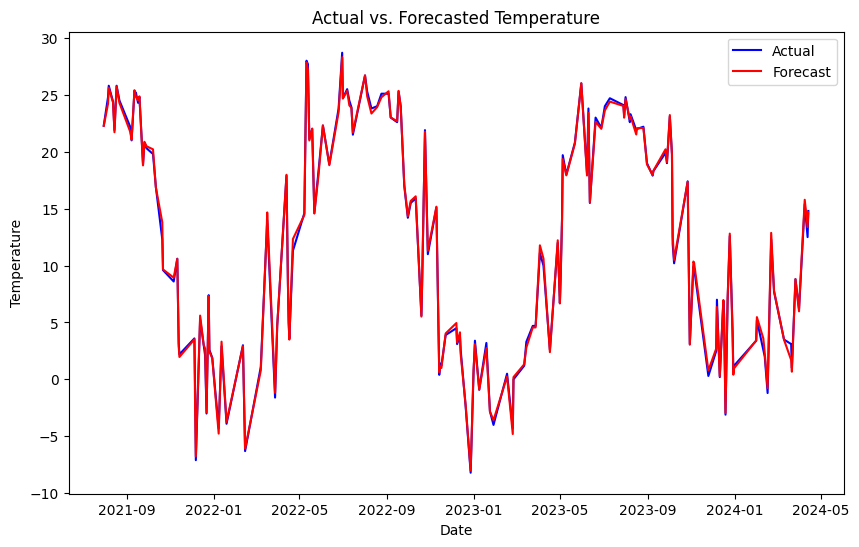

Mean Squared Error (MSE): 0.12257564954390388


In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Forecast temperatures for the test set
forecast = model_fit.forecast(steps=len(test_data), exog=test_exog)

# Plot actual vs. forecasted temperatures
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_temp, label='Actual', color='blue')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Calculate mean squared error (MSE)
mse = mean_squared_error(test_temp, forecast)
print('Mean Squared Error (MSE):', mse)


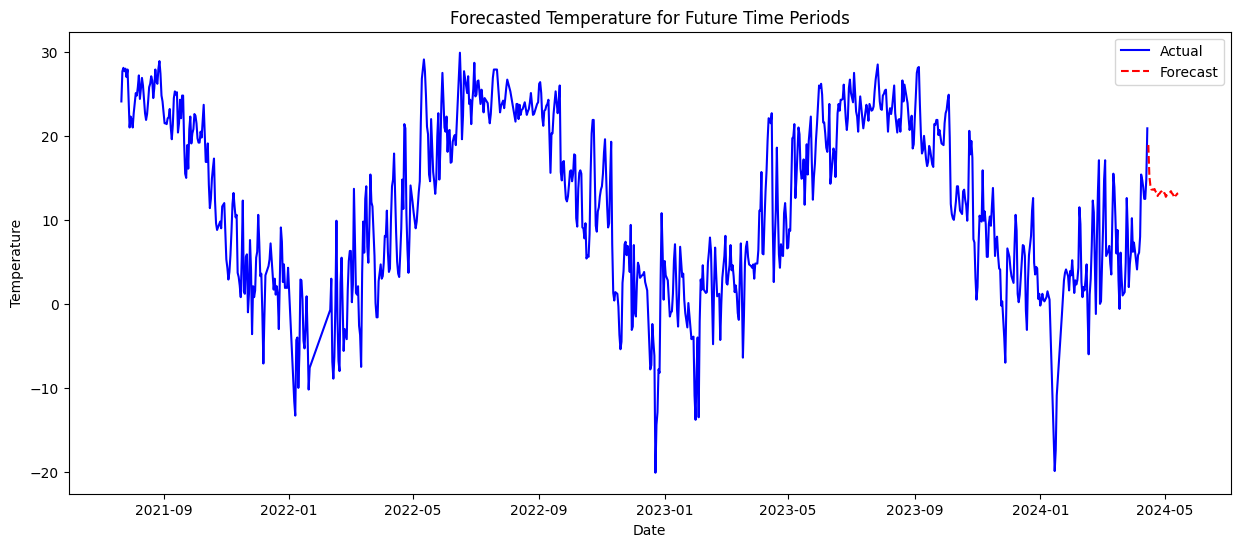

In [85]:
# Fit SARIMAX model to the entire dataset without exogenous variables
model = SARIMAX(selected_df['temp'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
steps = 30
# Forecast temperatures for future time periods without exogenous variables
future_forecast = model_fit.forecast(steps=steps)

# Generate dates for the forecasted time periods (assuming daily frequency)
forecast_dates = pd.date_range(start=selected_df.index[-1], periods=steps + 1, freq='D')[1:]

# Plot the forecasted temperatures for future time periods
plt.figure(figsize=(15, 6))
plt.plot(selected_df.index, selected_df['temp'], label='Actual', color='blue')
plt.plot(forecast_dates, future_forecast, label='Forecast', color='red', linestyle='--')
plt.title('Forecasted Temperature for Future Time Periods')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()



In [86]:

# Forecast temperatures for future time periods without exogenous variables
future_forecast = model_fit.forecast(steps=steps)

# Generate dates for the forecasted time periods (assuming daily frequency)
forecast_dates = pd.date_range(start=selected_df.index[-1], periods=steps + 1, freq='D')[1:]

# Create a DataFrame with forecasted temperature values and corresponding dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Temperature': future_forecast})

# Display the forecasted temperatures DataFrame
print(forecast_df)


          Date  Temperature
876 2024-04-15    18.918682
877 2024-04-16    15.195074
878 2024-04-17    14.074374
879 2024-04-18    13.616550
880 2024-04-19    13.606462
881 2024-04-20    13.586900
882 2024-04-21    13.679688
883 2024-04-22    13.381777
884 2024-04-23    13.255399
885 2024-04-24    12.842584
886 2024-04-25    13.059855
887 2024-04-26    13.138745
888 2024-04-27    13.343069
889 2024-04-28    13.404093
890 2024-04-29    13.534839
891 2024-04-30    13.258373
892 2024-05-01    13.143991
893 2024-05-02    12.742334
894 2024-05-03    12.958968
895 2024-05-04    13.031668
896 2024-05-05    13.230248
897 2024-05-06    13.282766
898 2024-05-07    13.415130
899 2024-05-08    13.145142
900 2024-05-09    13.036560
901 2024-05-10    12.643318
902 2024-05-11    12.858392
903 2024-05-12    12.924745
904 2024-05-13    13.117635
905 2024-05-14    13.161897
